# Exploring Bird Detection Data

In [1]:
import sage_data_client

First, we'll get all the the bird detection events in the last 30 days.

In [2]:
df = sage_data_client.query(start="-30d", filter={"name": "env.detection.avian.*"})

Next, we'll check much data each node has for any bird detection.

In [3]:
df.groupby("meta.vsn").size()

meta.vsn
W014     163
W028     483
W029      11
W06D     182
W06F    1112
W084     959
dtype: int64

Let's also look at the top 10 species of birds detected.

In [4]:
bird_detections = df.groupby("name").size()

In [5]:
top_10_birds = bird_detections.nlargest(10)
top_10_birds

name
env.detection.avian.picoides_tridactylus        618
env.detection.avian.cephalopterus_penduliger    554
env.detection.avian.nothura_darwinii            207
env.detection.avian.tympanuchus_cupido          134
env.detection.avian.nyctibius_griseus           133
env.detection.avian.podiceps_major               80
env.detection.avian.calypte_anna                 77
env.detection.avian.capito_wallacei              70
env.detection.avian.bubo_virginianus             48
env.detection.avian.crypturellus_erythropus      34
dtype: int64

To make this easier to visualize, let's view it as a pie chart.

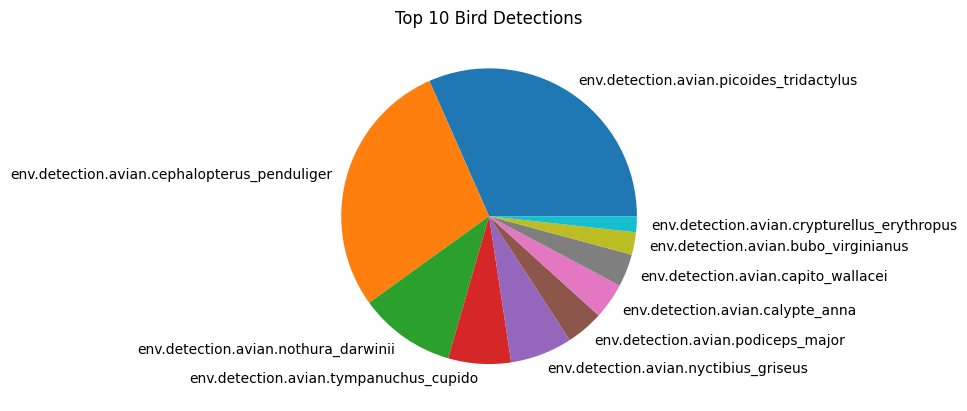

In [6]:
top_10_birds.plot(kind="pie", title="Top 10 Bird Detections");

Finally, the last analysis we'll do is to group the number of detections per hour to look for day / night cycles.

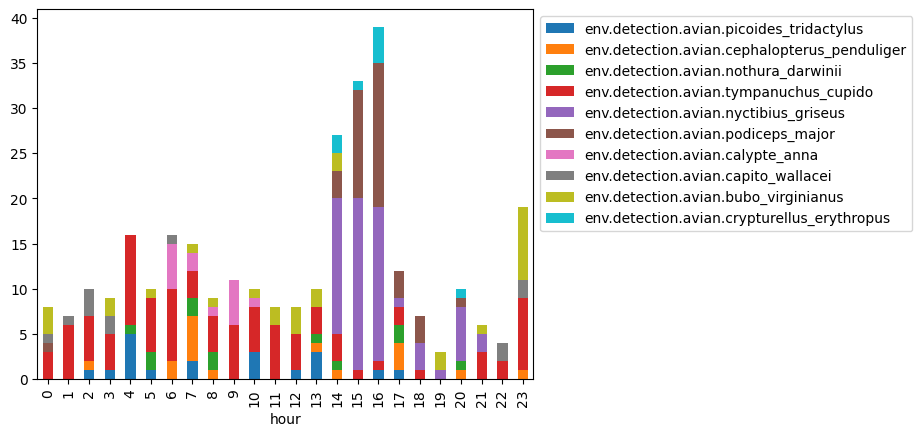

In [7]:
df["hour"] = df["timestamp"].dt.hour
counts = df[df.value > 0.20].pivot_table(index="hour", columns="name", aggfunc="size", fill_value=0)
counts[top_10_birds.index].plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1));

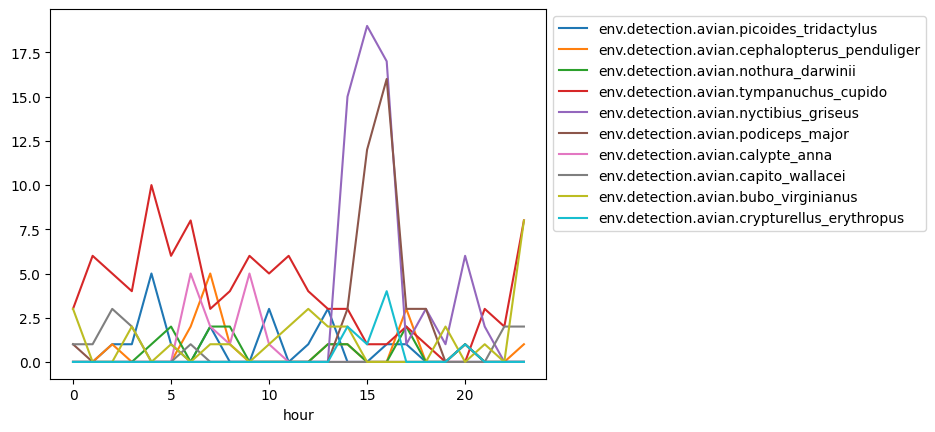

In [8]:
counts = df[df.value > 0.2].pivot_table(index="hour", columns="name", aggfunc="size", fill_value=0)
plots = counts[top_10_birds.index].plot().legend(bbox_to_anchor=(1, 1));